<a href="https://colab.research.google.com/github/abhi-11nav/Breast-Cancer-classification/blob/main/Breast_Cancer_classsification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BREAST CANCER CLASSIFICATION MODEL 

##### This notebook aims at creating a model to classify breast ultrasound images into one of the three classes : benign, malignant and normal. 


 **DATASET CREDITS : https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset**
 
 Repository for this project can be found here : https://github.com/abhi-11nav/Breast-Cancer-classification/tree/main/Data

.

In [79]:
# Importing the necessary libraries 

import pandas as pd
import numpy as np 

In [80]:
# Cloning the github repository for data 

!git clone https://github.com/abhi-11nav/Breast-Cancer-classification.git

fatal: destination path 'Breast-Cancer-classification' already exists and is not an empty directory.


Sucessfully cloned

### Splitting the folders into train and validation data

In [81]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
# directory where all the images are present 
image_directory = "/content/Breast-Cancer-classification/Data"

# Directory where the training data will be stored
!mkdir split_data

train_directory = "/content/split_data"

mkdir: cannot create directory ‘split_data’: File exists


In [83]:
# Credits : https://medium.com/nerd-for-tech/easily-split-your-directory-into-train-validation-and-testing-format-f1359f34dd93

import splitfolders

splitfolders.ratio(image_directory, # The location of dataset
                   output=train_directory, # The output location
                   ratio=(.85,.15), # The ratio of splited dataset
                   group_prefix=None, # If your dataset contains more than one file like ".jpg", ".pdf", etc
                   move=True # If you choose to move, turn this into True
                   )

Copying files: 0 files [00:00, ? files/s]


In [84]:
# Storing the paths of train and test data 

train_path = "/content/split_data/train"

validation_path = "/content/split_data/val"

In [85]:
# Importing the necessary libraries to build the model 

import tensorflow as tf
from tensorflow import keras 

from keras.layers import Dense, Flatten, Input
from keras.models import Model, Sequential
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator

from keras.applications.vgg19 import VGG19

In [86]:
# Declaring the standard input size for images 
img_size = [224,224]
model = VGG19(include_top=False, weights="imagenet",input_shape = img_size+[3])

In [87]:
# Retaining the weights of the pre-traiined model upto 17 layers 

for layers in model.layers[:12]:
  layers.trainable = False

In [88]:
from glob import glob 

class_count = len(glob(image_directory+"/*"))

print(class_count,"images to be classified")

3 images to be classified


In [89]:
glob(image_directory+"/*")

['/content/Breast-Cancer-classification/Data/normal',
 '/content/Breast-Cancer-classification/Data/malignant',
 '/content/Breast-Cancer-classification/Data/benign']

### Final 3 layers of the model - These help modify the model to suit our data 

1) additional_layer = final dense layer in the model 

2) Flatten layer = Flattens the input into 1d array

3) output layer = It is the prediction layer with softmax activation, so as to predict one of three classes

In [90]:
flatten_layer = Flatten()(model.output)

In [91]:
output_layer = Dense(class_count, activation="softmax")(flatten_layer)

In [92]:
# Merging the additionals layers and initial pretrained model 

final_model = Model(inputs= model.input, outputs=output_layer)

In [93]:
# Printing the model structure 

final_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [94]:
# Proviidng a custom learning rate for our optimizer - the optimizer used is adam optimizer 

optimizer = keras.optimizers.Adam(learning_rate = 1e-6)

In [95]:
# Compiling the final model 

final_model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics='accuracy')

In [96]:
# Data Augmentation

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.3,
                                   shear_range=0.2,
                                   horizontal_flip = True,
                                   vertical_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [97]:
training_set = train_datagen.flow_from_directory(train_path, target_size=(224,224),batch_size=32, class_mode="categorical")

Found 1260 images belonging to 3 classes.


In [98]:
validation_set = test_datagen.flow_from_directory(validation_path, target_size=(224,224),batch_size=32, class_mode="categorical")

Found 318 images belonging to 3 classes.


In [99]:
# Callback
Early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [100]:
history = final_model.fit(training_set, validation_data = validation_set, epochs=35,callbacks=Early_stopping_cb)

Epoch 1/35
40/40 [==============================] - 23s 560ms/step - loss: 1.0023 - accuracy: 0.5659 - val_loss: 0.9686 - val_accuracy: 0.5629
Epoch 2/35
40/40 [==============================] - 22s 554ms/step - loss: 0.9467 - accuracy: 0.5683 - val_loss: 0.9334 - val_accuracy: 0.5755
Epoch 3/35
40/40 [==============================] - 22s 546ms/step - loss: 0.9128 - accuracy: 0.5960 - val_loss: 0.8969 - val_accuracy: 0.5912
Epoch 4/35
40/40 [==============================] - 22s 557ms/step - loss: 0.8678 - accuracy: 0.6103 - val_loss: 0.8533 - val_accuracy: 0.6195
Epoch 5/35
40/40 [==============================] - 22s 540ms/step - loss: 0.8146 - accuracy: 0.6365 - val_loss: 0.8037 - val_accuracy: 0.6384
Epoch 6/35
40/40 [==============================] - 22s 543ms/step - loss: 0.7673 - accuracy: 0.6484 - val_loss: 0.7484 - val_accuracy: 0.6509
Epoch 7/35
40/40 [==============================] - 22s 546ms/step - loss: 0.7066 - accuracy: 0.6738 - val_loss: 0.6905 - val_accuracy: 0.6572

## PERFOMANCE VISUALIZATION OF THE MODEL 

In [101]:
import matplotlib.pyplot as plt 
%matplotlib inline

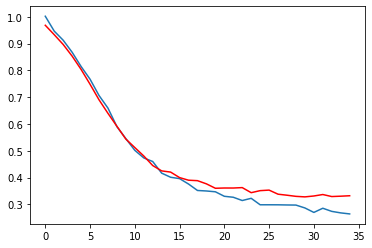

In [102]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')

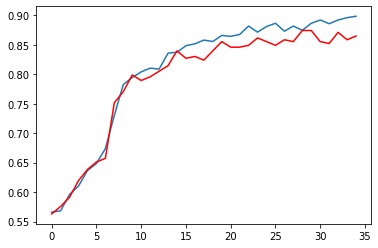

In [103]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], color='red')

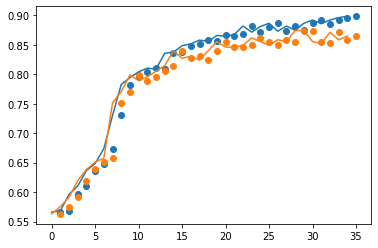

In [105]:
plt.scatter(np.arange(1,36), history.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.scatter(np.arange(1,36), history.history['val_accuracy'])
plt.plot(history.history['val_accuracy'])

In [107]:
# Saving the model 

final_model.save("model.h5")

# DEBUGGING

In [108]:
import cv2

In [119]:
img = cv2.imread("/content/split_data/train/malignant/malignant (10).png")
img = cv2.resize(img, [224,224])

In [120]:
layer_names = []

In [121]:
for layer in final_model.layers[:8]:
  layer_names.append(layer.name)
print(layer_names)

['input_5', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1']


In [122]:
img_tensor = np.expand_dims(img, axis = 0)

In [123]:
layer_outputs = [layer.output for layer in final_model.layers[:8]]

In [124]:
print(img_tensor.shape)

(1, 224, 224, 3)


In [125]:
activation_model = Model(inputs = final_model.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 0s 67ms/step


In [126]:
len(activations)

8

In [127]:
from google.colab.patches import cv2_imshow

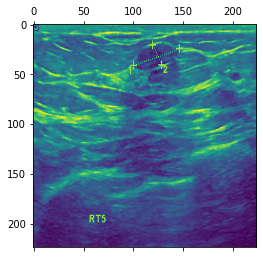

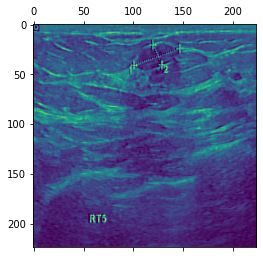

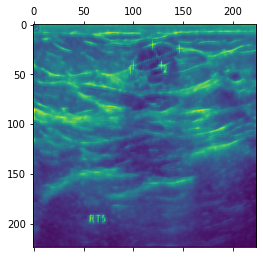

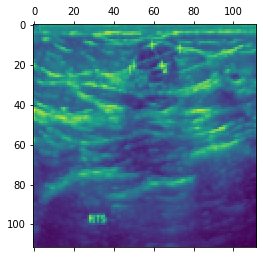

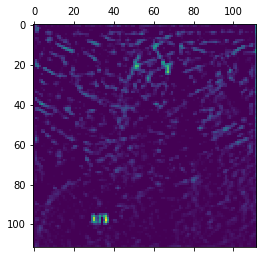

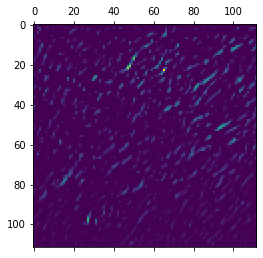

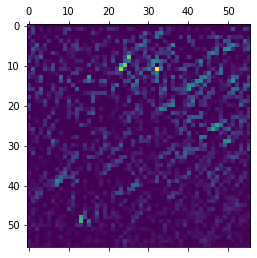

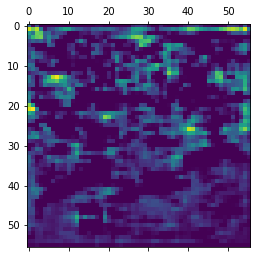

In [128]:
for i in range(0,len(activations)):
  plt.matshow(activations[i][0, :, :, 2], cmap ='viridis')